In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("data/stackloss.csv", sep=',')
df

,STACKLOSS,AIRFLOW,WATERTEMP,ACIDCONC
0,42,80,27,89
1,37,80,27,88
2,37,75,25,90
3,28,62,24,87
4,18,62,22,87
5,18,62,23,87
6,19,62,24,93
7,20,62,24,93
8,15,58,23,87
9,14,58,18,80


In [3]:
X0 = df.values[:,:-1]
N = len(X0)
print(X0.shape)

(21, 3)


In [4]:
pca_sk = PCA()
pca_sk.fit(X0)
U0 = pca_sk.transform(X0)

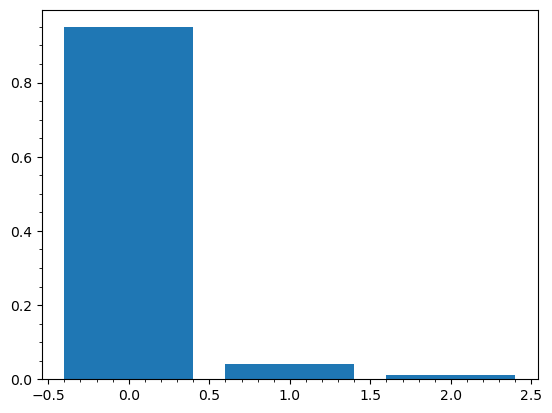

In [5]:
plt.bar(range(X0.shape[1]), pca_sk.explained_variance_ratio_)
plt.minorticks_on()
plt.show()

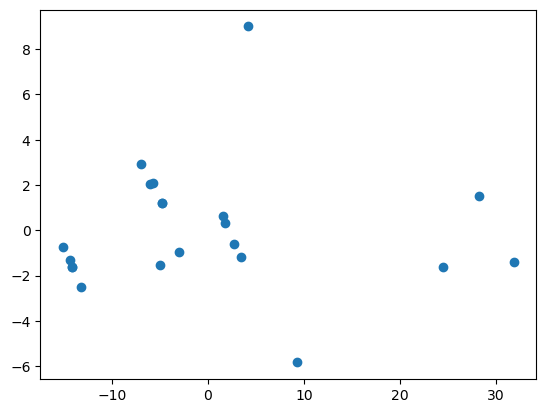

In [6]:
plt.scatter(U0[:,0], U0[:,1])
plt.show()

[17.52380952 60.42857143 21.0952381 ]


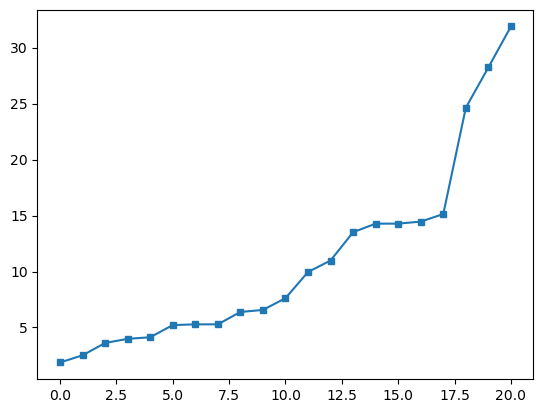

In [7]:
c0 = pca.location(X0)
print(c0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=4)
plt.show()

[15.45654538 58.56125245 20.55793379]


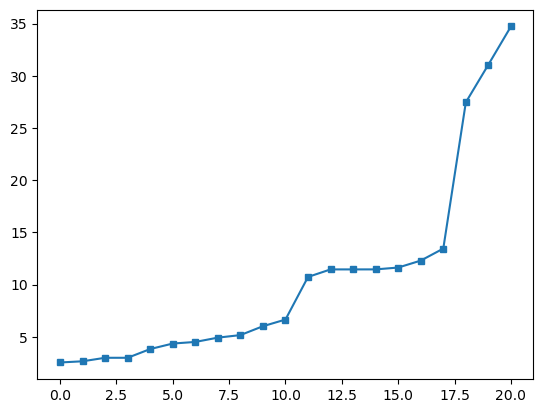

In [66]:
alpha = (N-3)/N
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
c = pca.robust_location(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=4)
plt.show()

In [67]:
X1 = X0 - c
X1_0 = X0 - c0

178.48691811704072 [0.73219184 0.65127728 0.19933143]


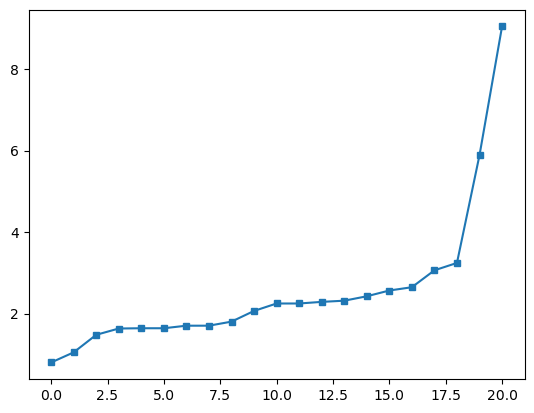

In [68]:
a1_0, L1_0 = pca.find_pc(X1_0, tol=1.0e-9)
print(L1_0, a1_0)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='s', markersize=4)
plt.show()

191.40137814260856 [0.75290183 0.62520696 0.20556043]


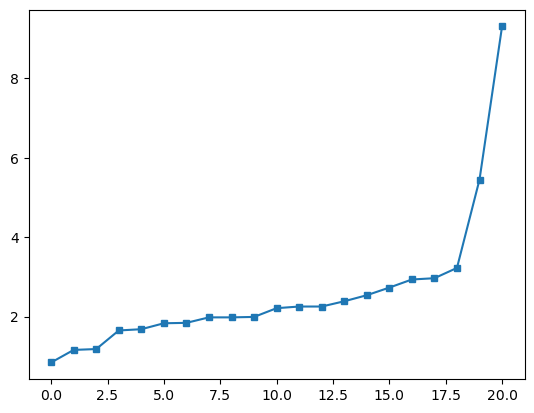

In [69]:
alpha = (N-2)/N
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a1, L1 = pca.find_robust_pc(X1, wma, tol=1.0e-8)
print(L1, a1)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='s', markersize=4)
plt.show()

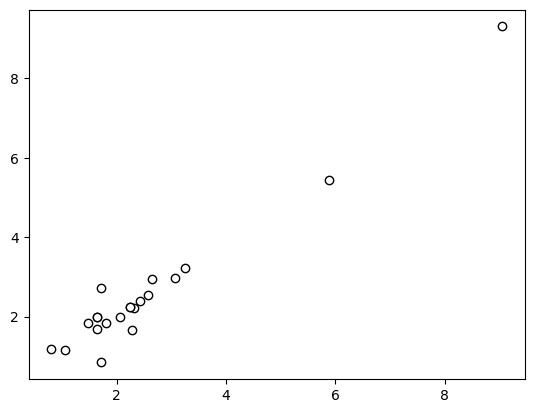

In [70]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1), c='w', edgecolors='k')
plt.show()

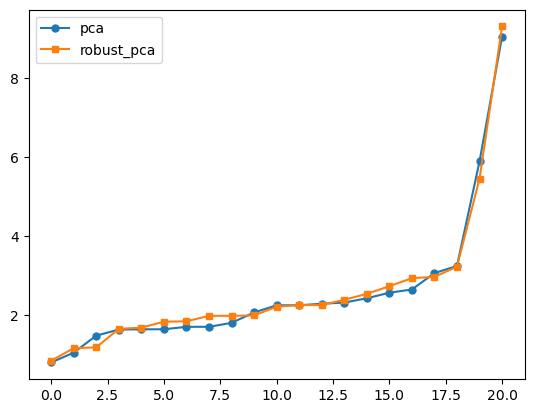

In [71]:
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=5, label='pca')
plt.plot(sorted(pca.distance_line(X1, a1)), marker='s', markersize=5, label='robust_pca')
plt.legend()
plt.show()

In [72]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

7.674070413046803 [-0.58271895  0.7505178  -0.31170766] 1.0000000000000002


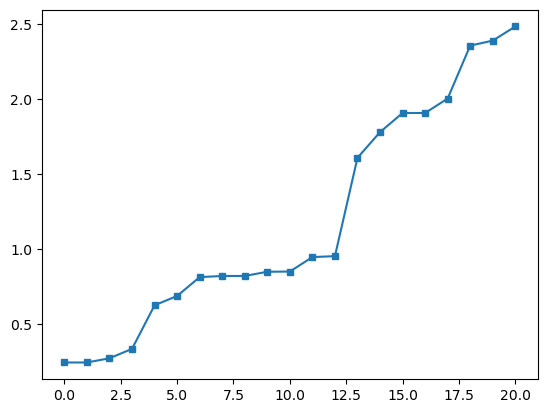

In [73]:
a2_0, L2_0 = pca.find_pc(X2_0, tol=1.0e-9)
print(L2_0, a2_0, a2_0 @ a2_0)
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='s', markersize=4)
plt.show()

2.7429210017499104 [ 0.27653223 -0.58395455  0.76323457]
-4.163336342344337e-16


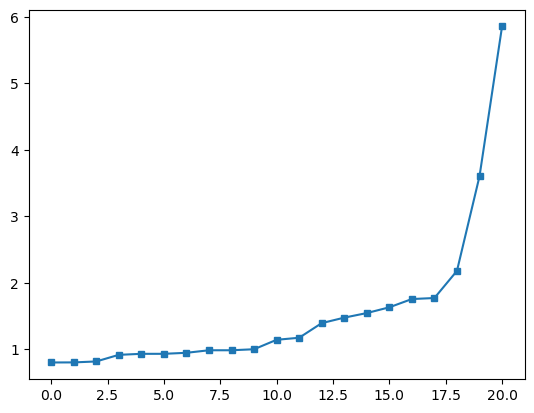

In [74]:
alpha = (N-7)/N
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a2, L2 = pca.find_robust_pc(X2, wma, tol=1.0e-9)
print(L2, a2)
print(a1 @ a2)
plt.plot(sorted(pca.distance_line(X2, a2)), marker='s', markersize=4)
plt.show()

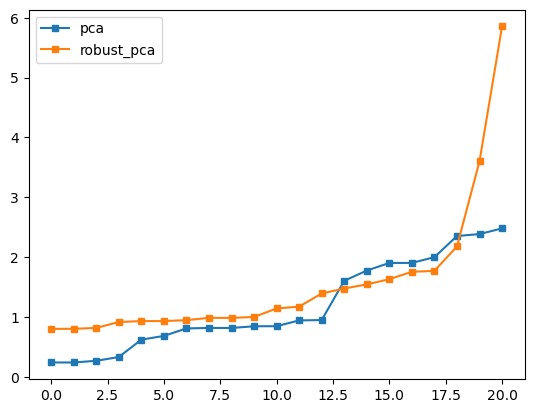

In [75]:
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='s', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(X2, a2)), marker='s', markersize=4, label='robust_pca')
plt.legend()
plt.show()

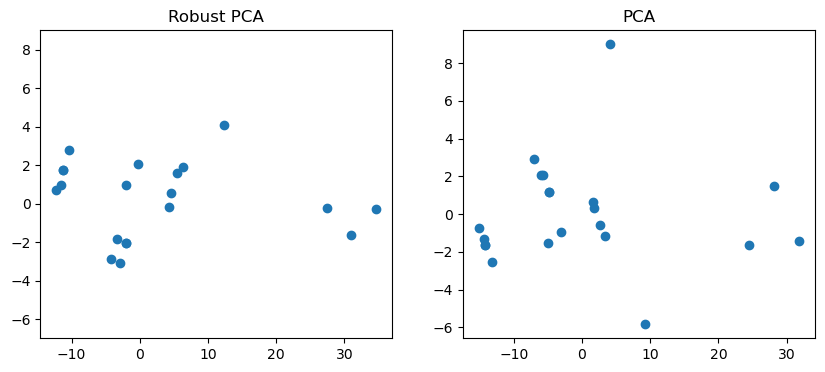

In [76]:
U1 = X1 @ a1
U2 = X1 @ a2

U1_0 = X1_0 @ a1_0
U2_0 = X1_0 @ a2_0

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Robust PCA')
plt.scatter(U1, U2)
plt.ylim(-7,9)
plt.subplot(1,2,2)
plt.title('PCA')
plt.scatter(U1_0, U2_0)
plt.savefig('fig/robust_pca_starsCYG_transformed.eps')
plt.show()

In [19]:
D = U1 * U1 + U2 * U2
D_0 = U1_0 * U1_0 + U2_0 * U2_0

print(D_0.sum(), D.sum())

plt.figure(figsize=(6.5,4*aa))
plt.title('Square distances')
plt.plot(sorted(D), label='Robust PCA')
plt.plot(sorted(D_0), label='PCA')
plt.minorticks_on()
plt.legend()
plt.savefig('fig/robust_pca_starsCYG_SD.eps')
plt.show()

3909.3807591318387 4075.5703877398805


NameError: name 'aa' is not defined

In [ ]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [ ]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt((N-6)/N, 0.001))
S = pca.robust_scatter_matrix(X1, wma)
print(S)

In [ ]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

In [ ]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c[0]], [c[1]], s=81, c='w', edgecolors='k')
plt.plot([c[0]+A[0,0], c[0], c[0]+A[0,1]], [c[1]+A[1,0], c[1], c[1]+A[1,1]], 
         c='k', label='Robust PCA 2')
# plt.plot([c[0], c[0]+A[0,0]], [c[1], c[1]+A[1,0]], label='1')
# plt.plot([c[0], c[0]+A[0,1]], [c[1], c[0]+A[1,1]], label='2')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]+a1_0[0], c0[0], c0[0]+a2_0[0]], [c0[1]+a1_0[1], c0[1], c0[1]+a2_0[1]], 
         c='k', linestyle='--', label='pca')
plt.plot([c[0]+a1[0], c[0], c[0]+a2[0]], [c[1]+a1[1], c[1], c[1]+a2[1]], 
         c='k', label='robust pca I')
plt.plot([c[0]+A[0,0], c[0], c[0]+A[0,1]], [c[1]+A[1,0], c[1], c[1]+A[1,1]], 
         c='k', linestyle=':', label='robust pca II')
plt.legend()
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.tight_layout()
plt.savefig('fig/robust_pca_starsCYG_1.eps')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_sk = PCA()
pca_sk.fit(XY0)
AA = pca_sk.components_
print(AA)
pca_sk.mean_

In [ ]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(XY1[:,0], XY1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-AA[0,0], 0, AA[0,0]], [-AA[1,0], 0, AA[1,0]], linestyle='--', label='1 (sk)')
plt.plot([-AA[0,1], 0, AA[0,1]], [-AA[1,1], 0, AA[1,1]], linestyle='--', label='2 (sk)')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()